In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Linear Regression Model                                 (DATASET 1)

In [28]:
df = pd.read_csv("Data1.csv")
# df

In [29]:
df.insert(0, "x0", 1)
d = 2

In [30]:
accu_vector = np.array(([0.],)*d)
accu_matrix = accu_vector * accu_vector.T
accu_matrix


array([[0., 0.],
       [0., 0.]])

In [31]:
def Xi_Xi_T(df):
    Xi_XiT_vect =  accu_matrix
    for i in range(len(df)):
        Xi_XiT_vect += (np.array((df.iloc[i][:d],)).T) @ (np.array((df.iloc[i][:d],)))
    return Xi_XiT_vect    
   
# Xi_XiT_vector = Xi_Xi_T(df)

In [32]:
inverse = np.linalg.inv(Xi_Xi_T(df))
inverse.shape 

(2, 2)

In [33]:
def XiYi(df):
    l = accu_vector
    
    for i in range(len(df)):
        l += np.array((df.iloc[i][:d],)).T @ np.array((df.iloc[i][d:],)).T
    return l    
xiyi_vector = XiYi(df)        

In [34]:
w = np.matmul(inverse, xiyi_vector)
w
# def W_val(inverse, xiyi_vector):
#     w = np.matmul(inverse, xiyi_vector)
#     return w

array([[5.68078713],
       [2.38406007]])

In [35]:
def predict(vector):
    global w
    
    return w.T @ vector


In [36]:
def prediction_values(df):
    lst = []
    
    for i in range(len(df)):
        k = predict(df.iloc[i][:d])
        lst.append(k[0])
    return lst

prediction_val = prediction_values(df)

In [37]:
df["predicted_values"] = prediction_val
# df

ERRORS

In [38]:
MSE = np.mean((df['y'] - df['predicted_values'])**2)
RMSE = np.sqrt(np.mean((df['y'] - df['predicted_values'])**2))
MAE = np.mean(abs(df['y'] - df['predicted_values']))
print("Mean Square Error: ", MSE)
print("Root Mean Square Error: ", RMSE)
print("Mean Absolute Error: ", MAE)

Mean Square Error:  2.0785254017773265
Root Mean Square Error:  1.4417091945941547
Mean Absolute Error:  1.280555978429146


In [39]:
RSS = np.sum((df['y'] - df['predicted_values'])**2)
TSS = np.sum((np.mean(df['y']) - df['y'])**2)
R2 = 1 - (RSS/TSS)
R2

0.9579571905586358

Text(0.5, 1.0, 'Linear Regression Dataset 1')

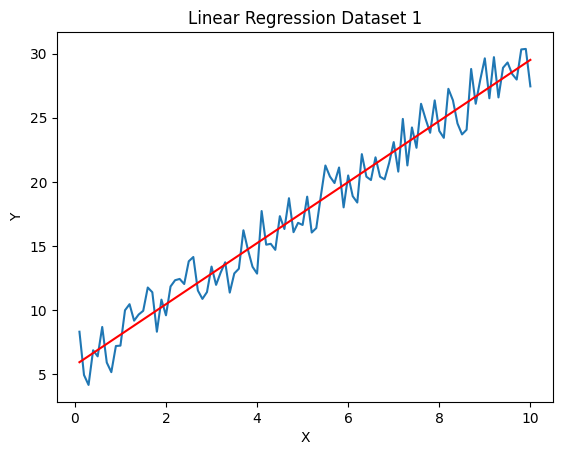

In [40]:
x = list(df["x"])
y = list(df["y"])
y1 = list(df["predicted_values"])

import matplotlib.pyplot as plt 

plt.plot(x, y)
plt.plot(x, y1, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Dataset 1")
# plt./

Verification of Dataset 1 Through Scikit_Learn 

Scikit-learn Model:
Mean Squared Error: 2.0785254017773274
Mean Absolute Error: 1.280555978429147
Root Mean Squared Error: 1.4417091945941551
R-squared: 0.9579571905586357


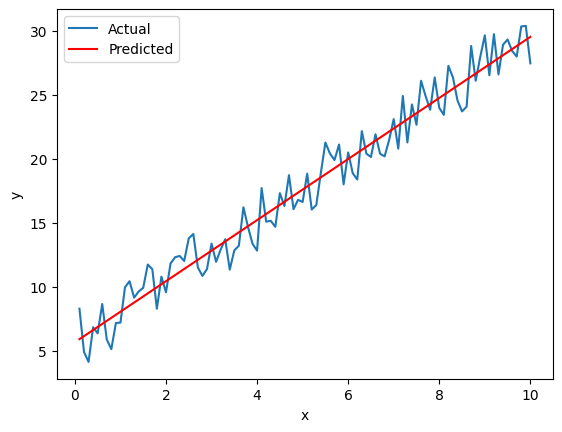

In [41]:

# Prepare the input and output data
input_columns = ['x0', 'x']
X = df[input_columns].values
y = df['y'].values

# Train a linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict using scikit-learn model
y_pred_sklearn = model_sklearn.predict(X)

# Calculate evaluation metrics using scikit-learn model
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

# Print evaluation metrics for scikit-learn model
print("Scikit-learn Model:")
print("Mean Squared Error:", mse_sklearn)
print("Mean Absolute Error:", mae_sklearn)
print("Root Mean Squared Error:", rmse_sklearn)
print("R-squared:", r2_sklearn)

plt.plot(df['x'], df['y'], label='Actual')
plt.plot(df['x'], y_pred_sklearn, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [42]:
MSE = np.mean((df['y'] - df['predicted_values'])**2)
RMSE = np.sqrt(np.mean((df['y'] - df['predicted_values'])**2))
MAE = np.mean(abs(df['y'] - df['predicted_values']))
print("Mean Square Error: ", MSE)
print("Root Mean Square Error: ", RMSE)
print("Mean Absolute Error: ", MAE)

Mean Square Error:  2.0785254017773265
Root Mean Square Error:  1.4417091945941547
Mean Absolute Error:  1.280555978429146


Gradient Descent

In [43]:
def Gradient_descent(X, Y, learning_rate):
    
    df_len = len(df["y"])
    m = 0
    c = 0
    
    for i in range(1000):
        sum = 0
        for i in range(df_len):
            val = c*X[i] + m*X[i]*X[i] - X[i]*Y[i]
            sum += val
        new_m = m - learning_rate * ((2/df_len) * sum) 
        m = new_m
        
        sum = 0
        for i in range(df_len):
            val = c + m*X[i] - Y[i]
            sum += val
        new_c = c - learning_rate * ((2/df_len) * sum)
        c = new_c
    
    return (c , m)

X = df["x"]
Y = df["y"]
output =Gradient_descent(X, Y, 0.01)
w_new = np.array((output))
w_new

array([5.63972603, 2.3902332 ])

In [44]:
w

array([[5.68078713],
       [2.38406007]])

In [45]:
def new_predict(vector):
    global w_new
    
    return w_new.T @ vector


In [46]:
def prediction_values1(df):
    lst = []
    
    for i in range(len(df)):
        k = new_predict(df.iloc[i][:d])
        lst.append(k)
    return lst

prediction_val1 = prediction_values1(df)
df['predicted_values1'] = prediction_val1
# prediction_val1

In [47]:
RSS = np.sum((df['y'] - df['predicted_values1'])**2)
TSS = np.sum((np.mean(df['y']) - df['y'])**2)
R3 = 1 - (RSS/TSS)
R3

0.9579487906006439

In [48]:
R2

0.9579571905586358